In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from torchvision import transforms
from torchvision.models import vgg19

from utils import get_features, transformation_max, transformation_mean, get_weights

# Data Preprocessing

In [2]:
images_name = os.listdir('data/sneakers')
images = [Image.open(f"data/sneakers/{name}") for name in images_name]

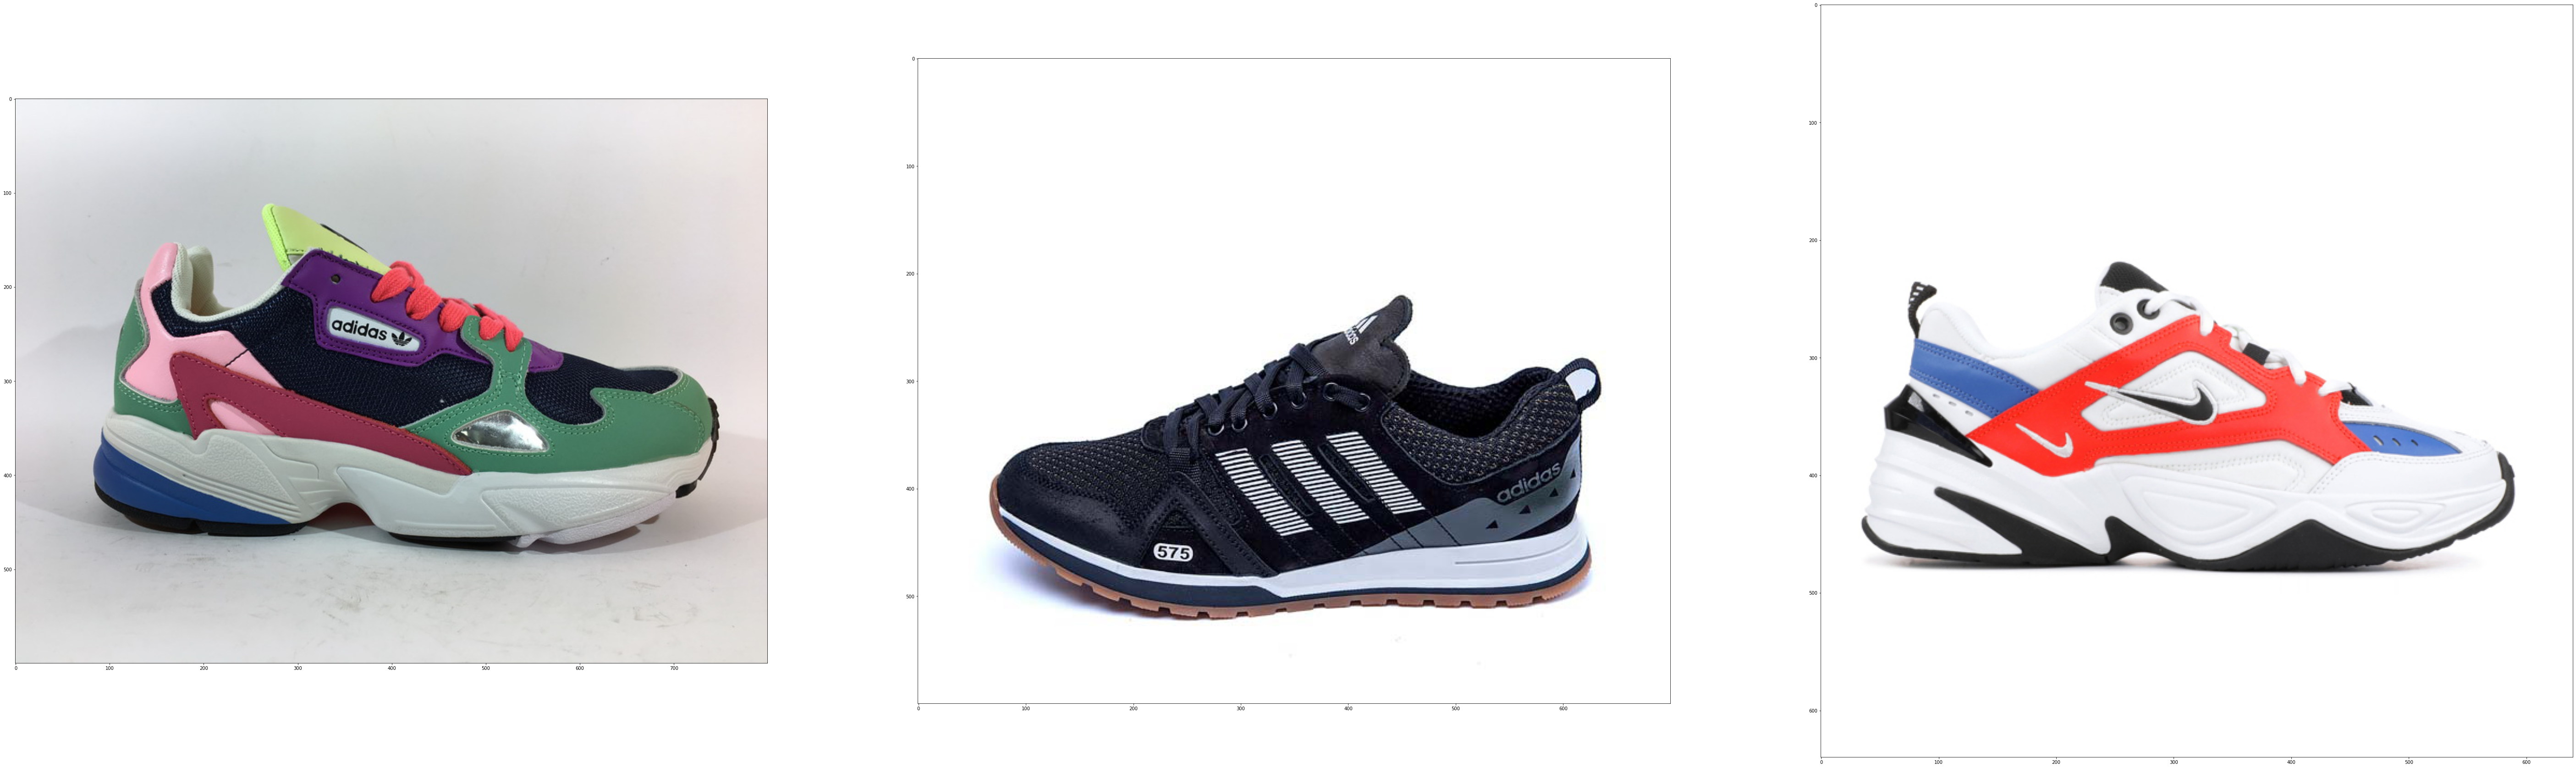

In [3]:
fig, axes = plt.subplots(1, 3)
for idx, img in enumerate(images):
    axes[idx].imshow(img)

fig.set_figwidth(100)
fig.set_figheight(100)

plt.show()

In [4]:
SIZE = 500
transform = transforms.Compose([
    transforms.Resize(SIZE),
    transforms.ToTensor(),
    transforms.Normalize(
        (0.485, 0.456, 0.406), 
        (0.229, 0.224, 0.225)
    )
])

images_tensor = [transform(img).unsqueeze(0) for img in images]

# Model

In [5]:
vgg = vgg19(pretrained=True).features

for param in vgg.parameters():
    param.requires_grad_(False)
    
    
vgg;

![alt text](data/vgg19.png "Title")

In [6]:
layers = {
    '0':  'conv1_1',
    '5':  'conv2_1', 
    '10': 'conv3_1', 
    '19': 'conv4_1',
    '28': 'conv5_1'
}

textures = [get_features(img, vgg, layers) for img in images_tensor]

# Get first conv layer

### *max_func*

In [7]:
result = []
for texture in textures:
    conv1 = texture.get('conv1_1')
    result.append(transformation_max(conv1))

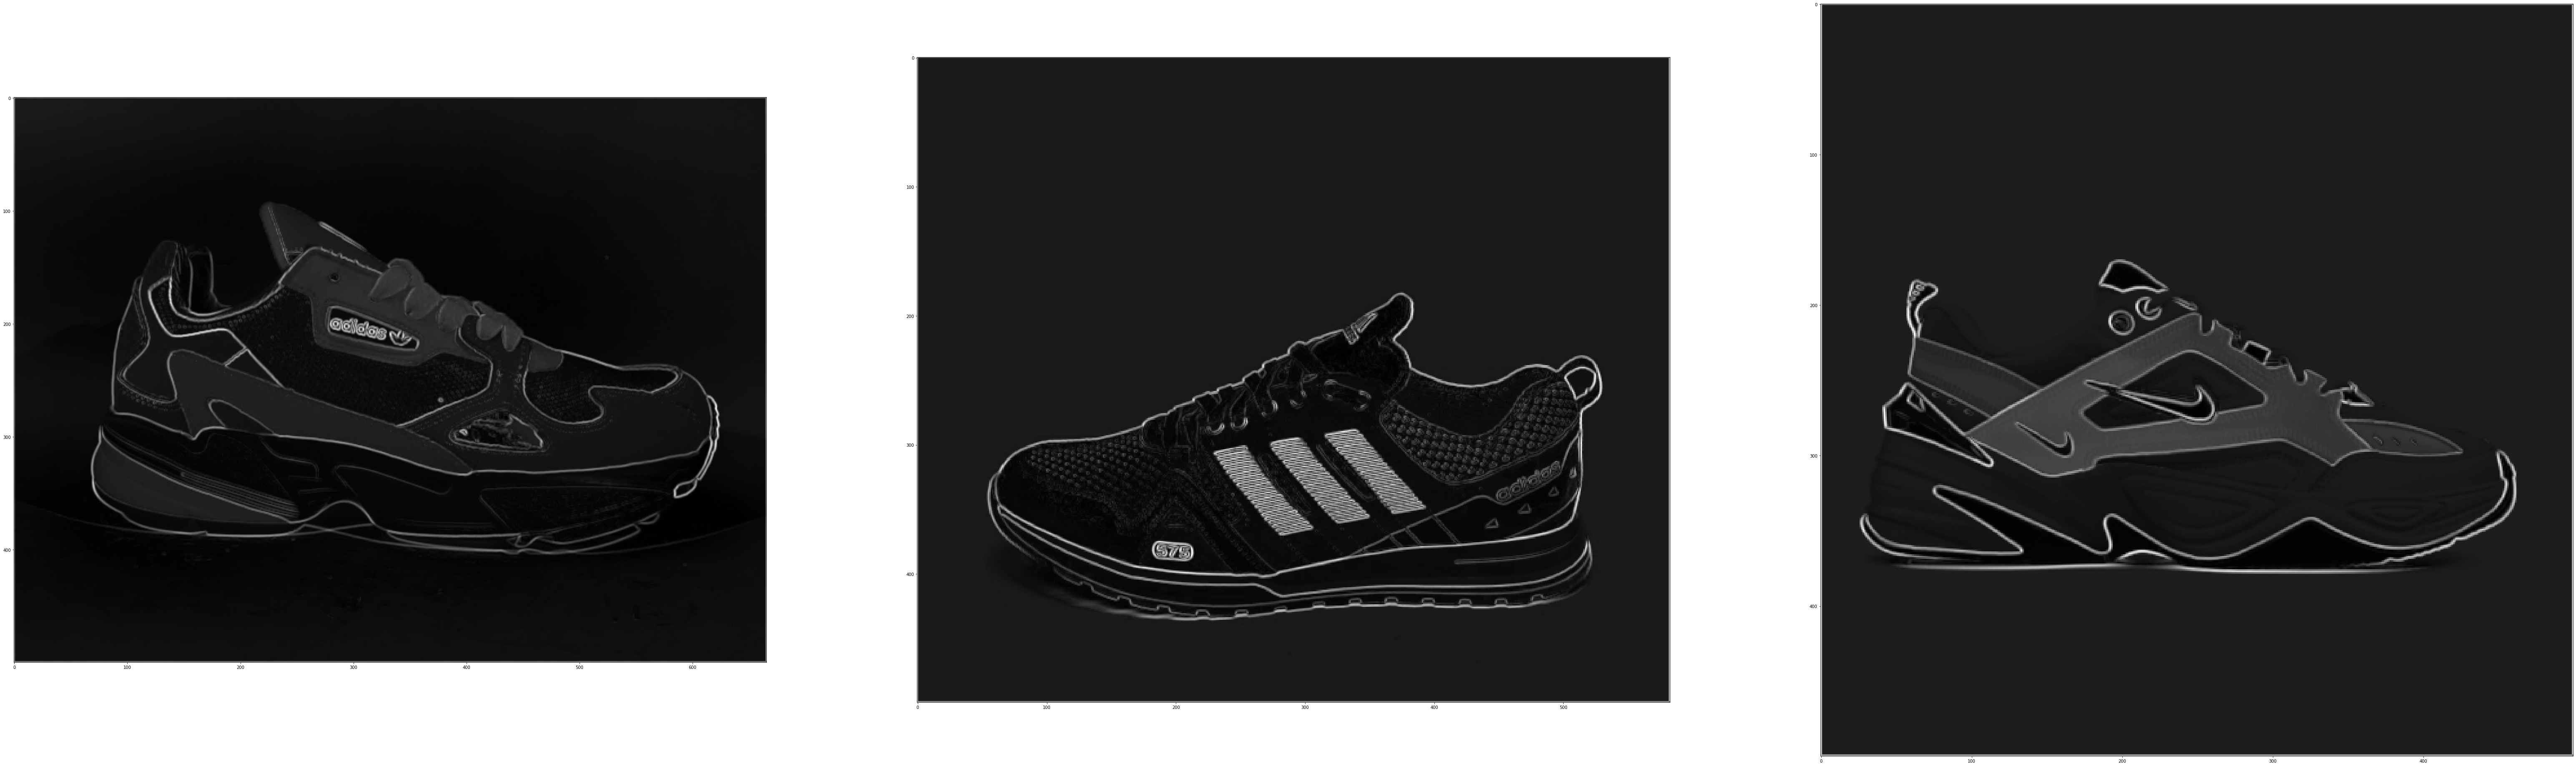

In [8]:
fig, axes = plt.subplots(1, 3)
for idx, img in enumerate(result):
    axes[idx].imshow(img, cmap="gray")

fig.set_figwidth(110)
fig.set_figheight(110)

plt.show()

### *mean_func*

In [9]:
result = []
for texture in textures:
    conv1 = texture.get('conv1_1')    
    result.append(transformation_mean(conv1, get_weights(1)))

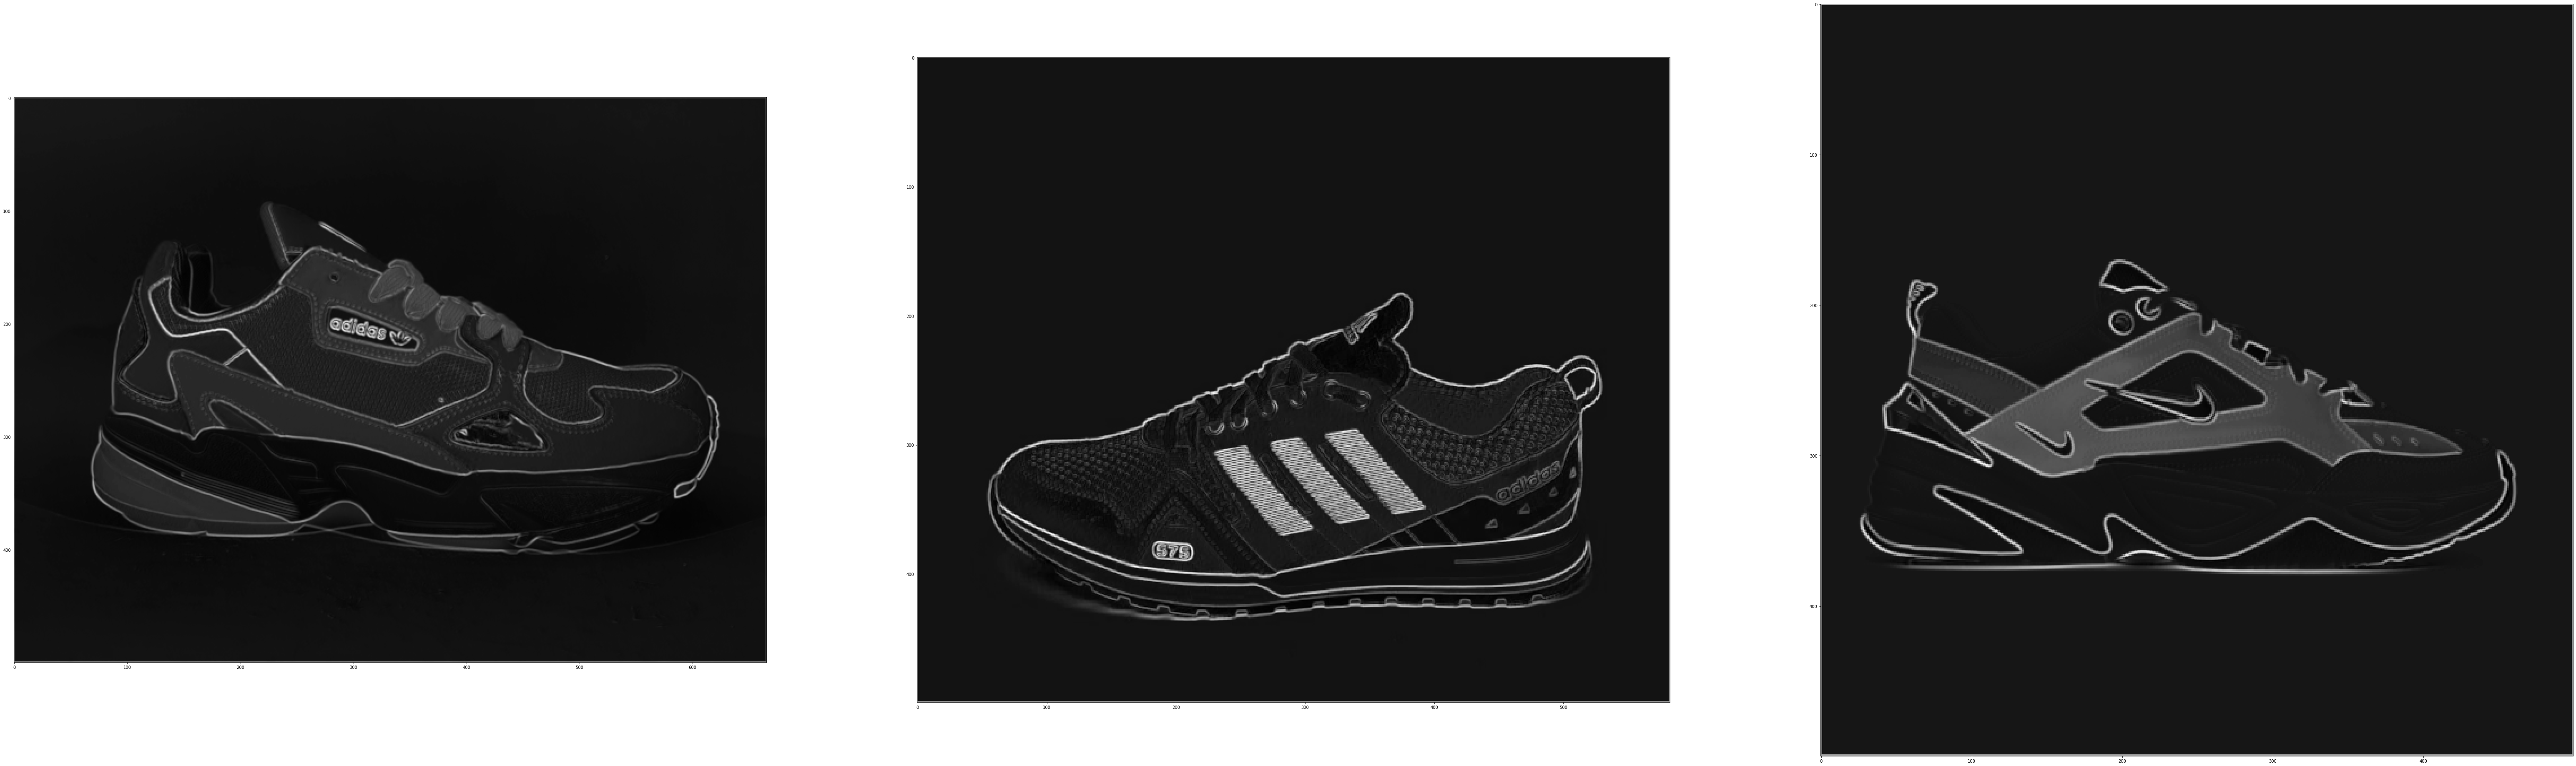

In [10]:
fig, axes = plt.subplots(1, 3)
for idx, img in enumerate(result):
    axes[idx].imshow(img, cmap="gray")

fig.set_figwidth(110)
fig.set_figheight(110)

plt.show()